<a href="https://colab.research.google.com/github/John-Dennis-AI/John-Dennis-AI.github.io/blob/master/XGBoost_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using XGBoost to Classify Wine**

If needed, install XGBoost

In [1]:
pip install xgboost

Set up the data (to make it easy, use data directly from sklearn)

In [0]:
from sklearn import datasets
import xgboost as xgb

bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

Define the train-test split into 80% train, 20% test

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

Transform data into a DMatrix, an internal data structure used by XGBoost for efficiency

In [0]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

Set up the XGBoost parameters (set to default values as per [parameter list](https://xgboost.readthedocs.io/en/latest/parameter.html))

In [0]:
params = {
    'eta': 0.3,  # Similar to learning rate
    'max_depth': 6,  
    'objective': 'multi:softprob',  # Same as softmax but with predicted probability
    'num_class': 3
    } 

steps = 25  # Number of training iterations

Train the Model

In [0]:
model = xgb.train(params, D_train, steps)

Run the Model

In [7]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))
print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))


Accuracy = 0.9736842105263158
Precision = 0.9736842105263158
Recall = 0.9676923076923076


Plot the Decision Tree



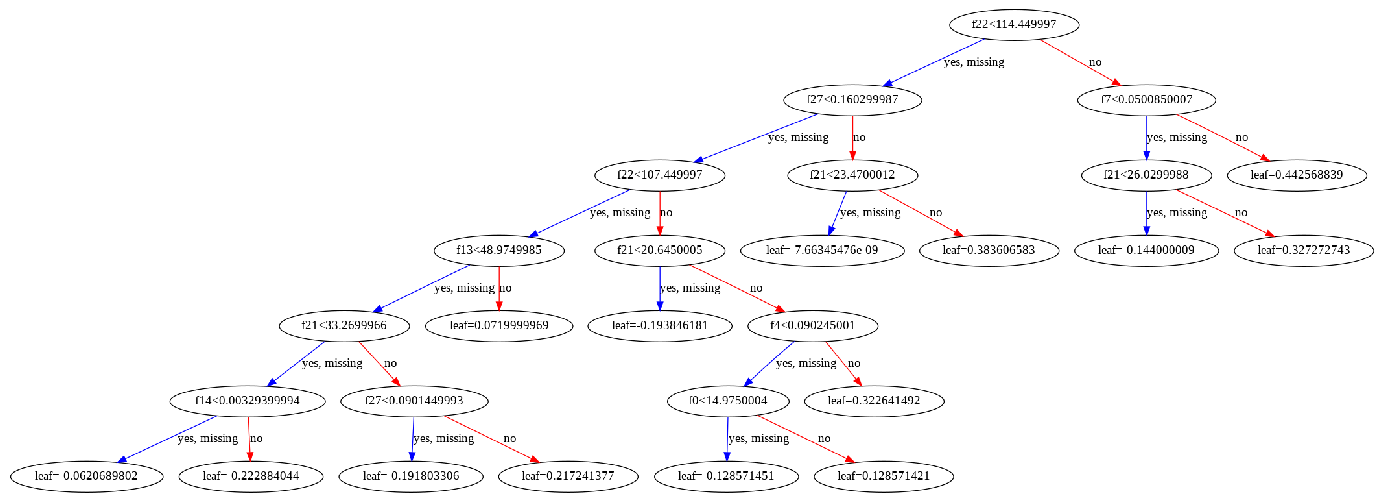

In [8]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,9)
plot_tree(model)
plt.show()